# # Exploratívna analýza

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import operator
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 50)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Načítanie dát a prvý náhľad na ne.

In [2]:
data = pd.read_csv("data/train.csv", sep='\t')
data.head()

cli_pl_header  cli_pl_body  cli_cont_len  srv_pl_header  srv_pl_body  \
0            667            0             0            336       143151   
1            667            0             0            336       143151   
2            667            0             0            336       143151   
3            592            0             0            238         1269   
4            592            0             0            238         1269   

   srv_cont_len  aggregated_sessions   bytes  net_samples  tcp_frag  tcp_pkts  \
0        143151                    1  155494            1         0       162   
1        143151                    1  310988            1         0       324   
2        143151                    1  310988            1         0       324   
3          1269                    1    2401            1         0         5   
4          1269                    1    4802            1         0        10   

   tcp_retr  tcp_ooo  cli_tcp_pkts  cli_tcp_ooo  cli_tcp_retr  cli_tcp_frag  \
0         0        0            55            0             0             0   
1       108        0           110            0             1             0   
2       108        0           110            0             1             0   
3         0        0             3            0             0             0   
4         3        0             6            0             1             0   

   cli_tcp_empty  cli_win_change  cli_win_zero  cli_tcp_full  \
0             54               5             0             0   
1            108               5             0             0   
2            108               5             0             0   
3              2               1             0             0   
4              4               1             0             0   

   cli_tcp_tot_bytes  cli_pl_tot  cli_pl_change  srv_tcp_pkts  srv_tcp_ooo  \
0               4517         667              1           107            0   
1               9034         667              1           214            0   
2               9034         667              1           214            0   
3                778         592              1             2            0   
4               1556         592              1             4            0   

   srv_tcp_retr  srv_tcp_frag  srv_tcp_empty  srv_win_change  srv_win_zero  \
0             0             0              0               4             0   
1           107             0              0               4             0   
2           107             0              0               4             0   
3             0             0              0               0             0   
4             2             0              0               0             0   

   srv_tcp_full  srv_tcp_tot_bytes  srv_pl_tot  srv_pl_change  srv_tcp_win  \
0             0             150977      143487              2      1045888   
1             0             301954      143487              2      1045888   
2             0             301954      143487              2      1045888   
3             0               1623        1507              2        66176   
4             0               3246        1507              2        66176   

   srv_tx_time  cli_tcp_win  client_latency  application_latency  cli_tx_time  \
0      691.231       522944          36.548                2.195          0.0   
1      690.926       522944          36.291                2.988          0.0   
2      691.257       522944          36.539                2.209          0.0   
3        0.082        68992         144.926                3.278          0.0   
4        0.111        68992         144.901                3.292          0.0   

   load_time  server_latency  proxy  sp_healthscore  sp_req_duration  \
0    766.522           1.097      0               0                0   
1    766.496           1.494      0               0                0   
2    766.544           1.104      0               0                0   
3    293.212           

Dáta sú načítané do dataframe-u, takže si teraz môžem zobraziť aké typy dát vlastne obsahujú

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761179 entries, 0 to 761178
Data columns (total 49 columns):
cli_pl_header          761179 non-null int64
cli_pl_body            761179 non-null int64
cli_cont_len           761179 non-null int64
srv_pl_header          761179 non-null int64
srv_pl_body            761179 non-null int64
srv_cont_len           761179 non-null int64
aggregated_sessions    761179 non-null int64
bytes                  761179 non-null int64
net_samples            761179 non-null int64
tcp_frag               761179 non-null int64
tcp_pkts               761179 non-null int64
tcp_retr               761179 non-null int64
tcp_ooo                761179 non-null int64
cli_tcp_pkts           761179 non-null int64
cli_tcp_ooo            761179 non-null int64
cli_tcp_retr           761179 non-null int64
cli_tcp_frag           761179 non-null int64
cli_tcp_empty          761179 non-null int64
cli_win_change         761179 non-null int64
cli_win_zero           761179 non-

Vidíme, že dáta obsahujú 7 float stĺpcov a 42 int stĺpcov a nenachádzajú sa v nich žiadne None ale Nan hodnoty.

In [4]:
data.describe()

cli_pl_header   cli_pl_body  cli_cont_len  srv_pl_header   srv_pl_body  \
count  761179.000000  7.611790e+05  7.611790e+05  761179.000000  7.611790e+05   
mean      767.099598  3.046965e+02  3.022624e+02     429.038246  3.832213e+04   
std       753.390462  8.206498e+03  7.776122e+03     348.347127  7.139453e+05   
min        38.000000  0.000000e+00  0.000000e+00      17.000000  0.000000e+00   
25%       383.000000  0.000000e+00  0.000000e+00     295.000000  1.140000e+02   
50%       572.000000  0.000000e+00  0.000000e+00     363.000000  1.362000e+03   
75%       908.000000  0.000000e+00  0.000000e+00     476.000000  9.577000e+03   
max     24253.000000  4.604503e+06  2.538295e+06   40315.000000  1.118097e+08   

       srv_cont_len  aggregated_sessions         bytes    net_samples  \
count  7.611790e+05             761179.0  7.611790e+05  761179.000000   
mean   1.031107e+05                  1.0  6.207421e+04       0.999982   
std    1.018259e+07                  0.0  1.050580e+06       0.004289   
min    0.000000e+00                  1.0  4.250000e+02       0.000000   
25%    4.300000e+01                  1.0  2.786000e+03       1.000000   
50%    9.510000e+02                  1.0  5.637000e+03       1.000000   
75%    6.924000e+03                  1.0  1.861000e+04       1.000000   
max    2.147484e+09                  1.0  2.355868e+08       1.000000   

            tcp_frag       tcp_pkts       tcp_retr        tcp_ooo  \
count  761179.000000  761179.000000  761179.000000  761179.000000   
mean        0.000012      68.754405      12.520908       9.665240   
std         0.004726     793.659032     254.058813     345.689127   
min         0.000000       2.000000       0.000000       0.000000   
25%         0.000000      10.000000       0.000000       0.000000   
50%         0.000000      16.000000       2.000000       0.000000   
75%         0.000000      30.000000       4.000000       0.000000   
max         2.000000   65535.000000   65535.000000   65535.000000   

        cli_tcp_pkts    cli_tcp_ooo   cli_tcp_retr  cli_tcp_frag  \
count  761179.000000  761179.000000  761179.000000      761179.0   
mean       27.317594       0.064726       0.788565           0.0   
std       385.917424       5.553854       3.113677           0.0   
min         1.000000       0.000000       0.000000           0.0   
25%         5.000000       0.000000       0.000000           0.0   
50%         8.000000       0.000000       1.000000           0.0   
75%        14.000000       0.000000       1.000000           0.0   
max     65535.000000    2956.000000     751.000000           0.0   

       cli_tcp_empty  cli_win_change   cli_win_zero   cli_tcp_full  \
count  761179.000000   761179.000000  761179.000000  761179.000000   
mean       25.071798        6.294448       0.029356       0.470018   
std       385.767517      148.378411       2.875077       8.570818   
min         0.000000        0.000000       0.000000       0.000000   
25%         3.000000        1.000000       0.000000       0.000000   
50%         6.000000        1.000000       0.000000       0.000000   
75%        12.000000        2.000000       0.000000       0.000000   
max     65535.000000    34495.000000    1324.000000    3652.000000   

       cli_tcp_tot_bytes    cli_pl_tot  cli_pl_change   srv_tcp_pkts  \
count       7.611790e+05  7.611790e+05  761179.000000  761179.000000   
mean        3.589576e+03  1.063409e+03       1.194567      43.109993   
std         3.328798e+04  8.098246e+03       1.710373     601.561917   
min         6.000000e+01  0.000000e+00       0.000000       1.000000   
25%         1.075000e+03  3.990000e+02       1.000000       4.000000   
50%         1.710000e+03  6.070000e+02       1.000000       8.000000   
75%         2.732000e+03  9.270000e+02       1.000000      16.000000   
max         8.563738e+06  4.599662e+06     398.000000   65535.000000   

         srv_tcp_ooo   srv_tcp_retr   srv_tcp_frag  srv_tcp_empty  \
count  761179.000000  761179.000000

Pridám si k dátam výsledky kategorizácie, aby som mohol vykresliť grafy závislostí

In [5]:
data['ids'] = pd.read_csv("data/train_target.csv", sep='\t', names=['id'])

Vyplotujem si histogramy všetkých stĺpcov, aby som odhalil potenciálnych outlayerov.

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


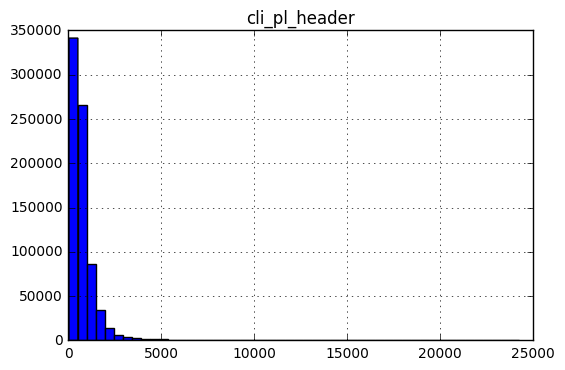

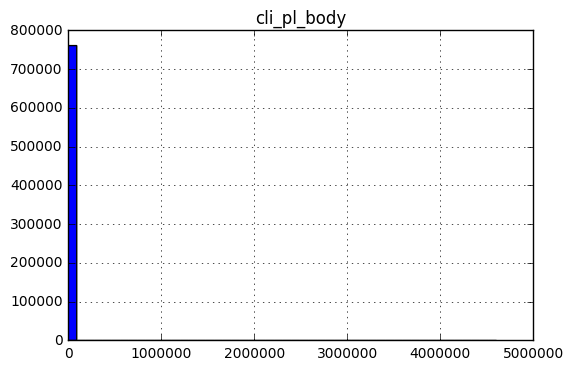

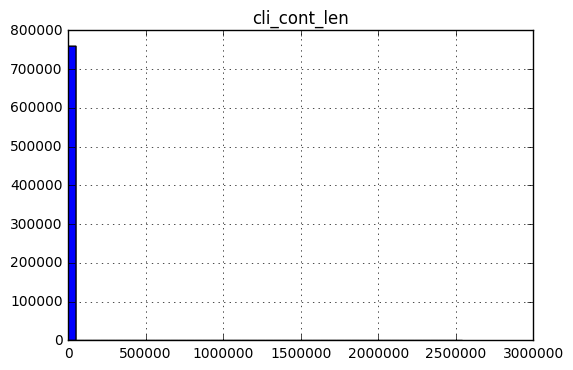

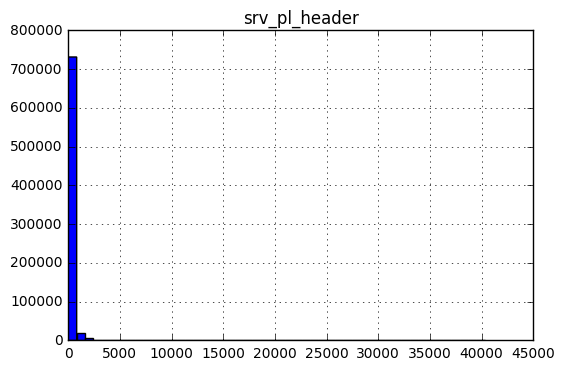

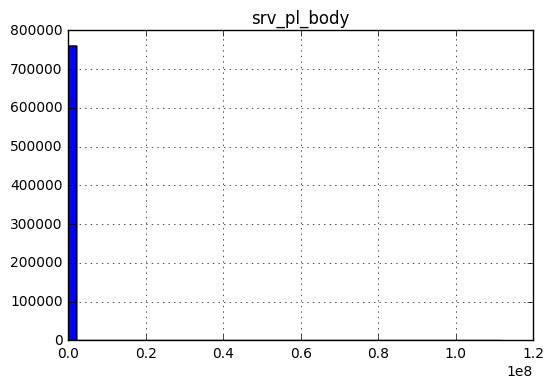

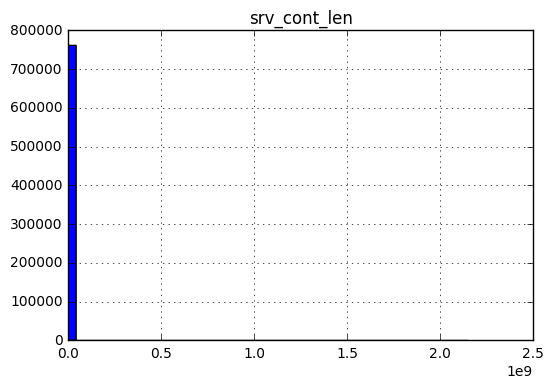

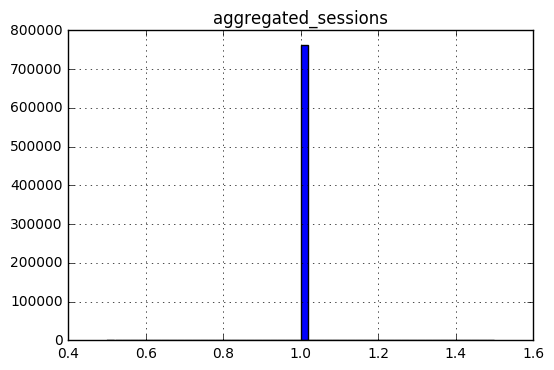

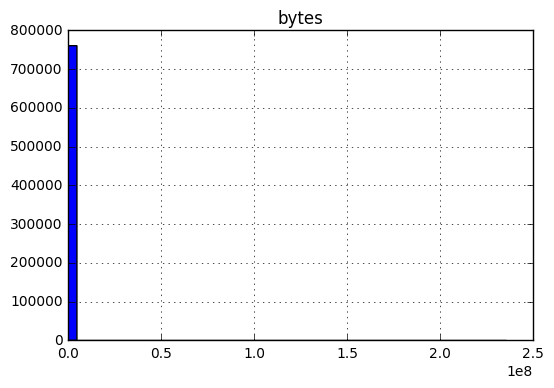

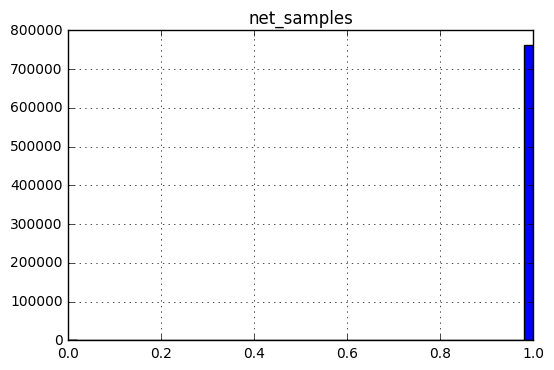

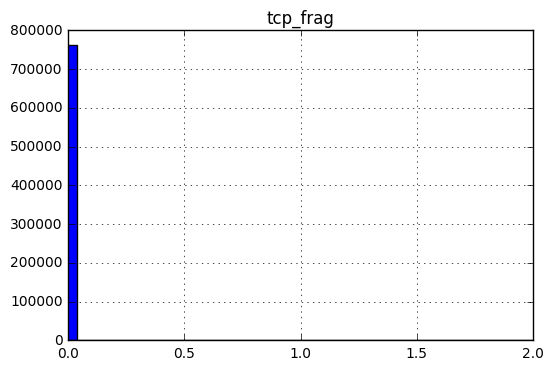

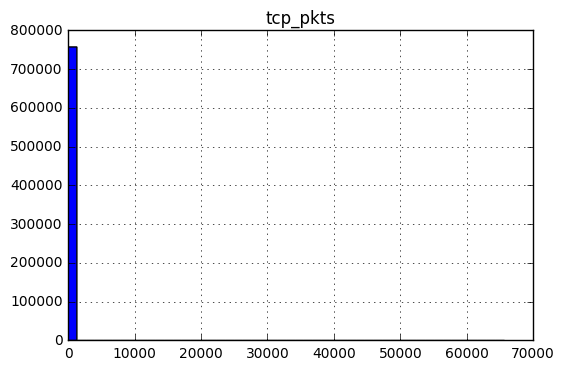

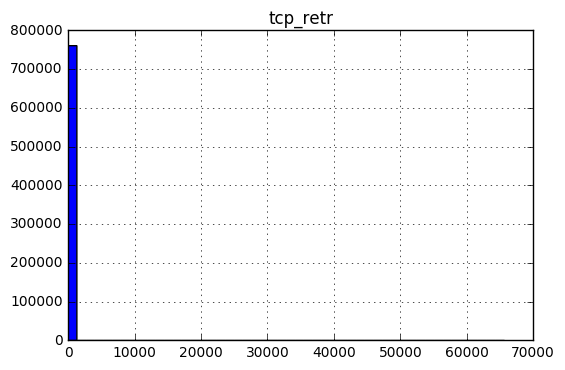

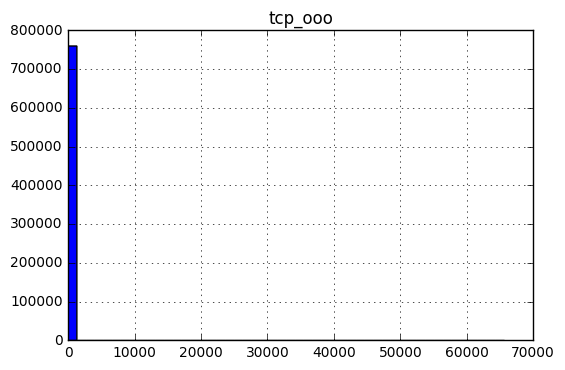

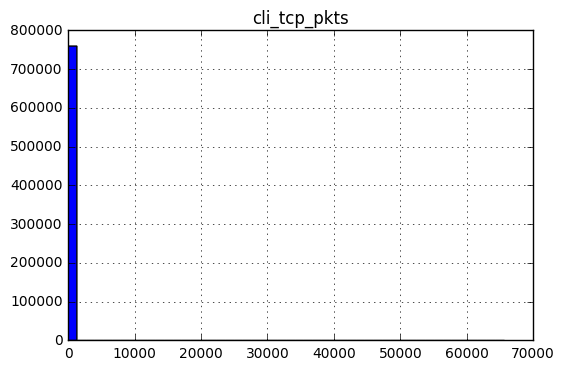

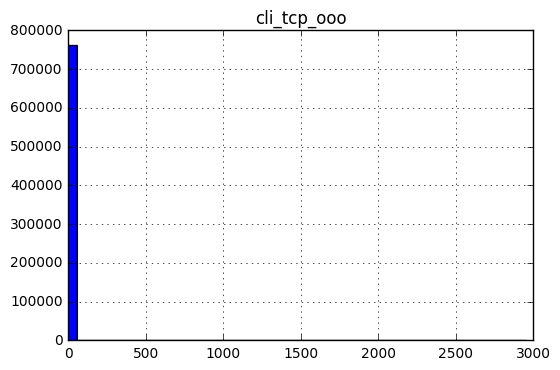

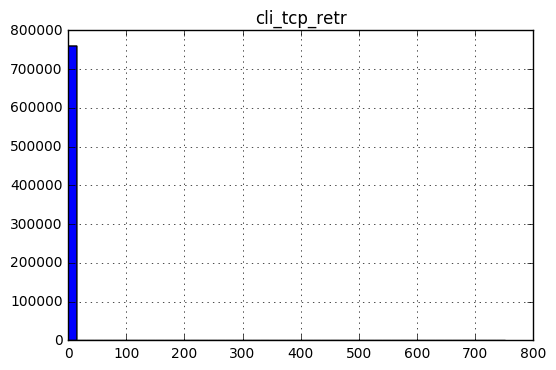

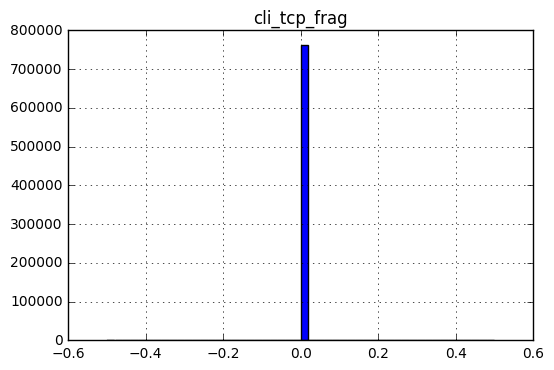

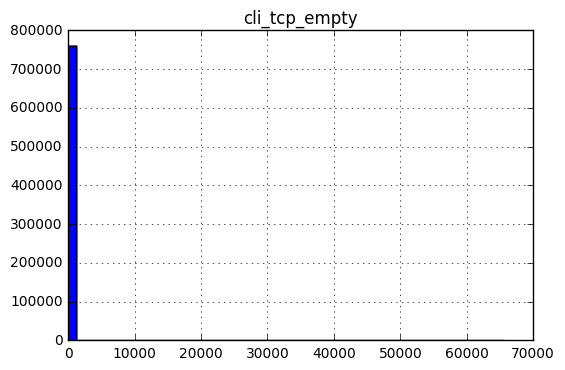

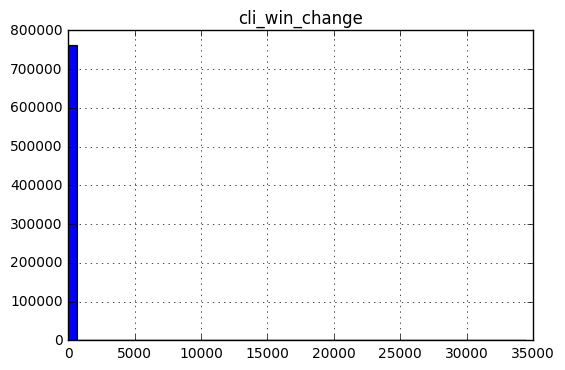

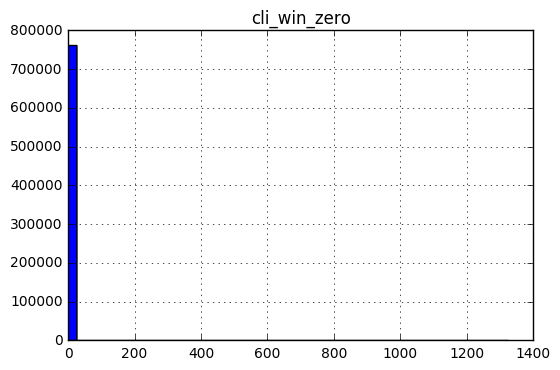

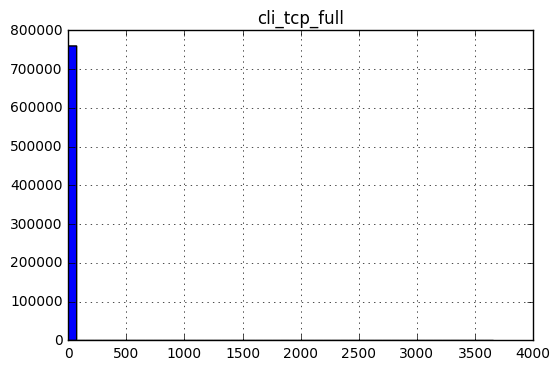

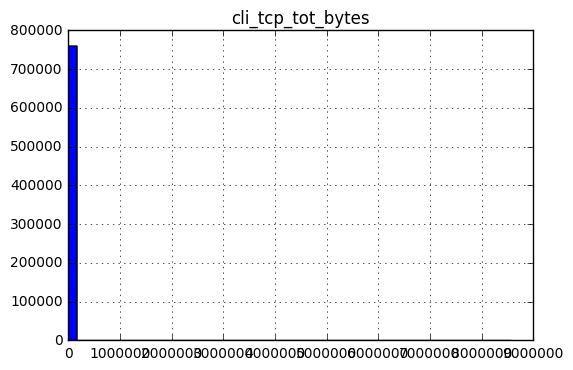

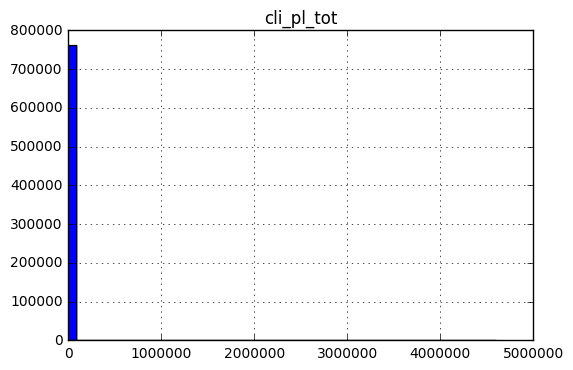

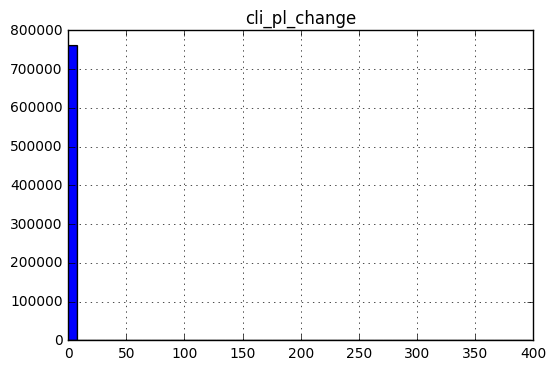

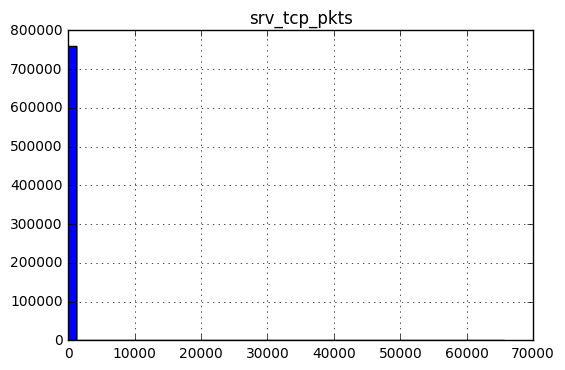

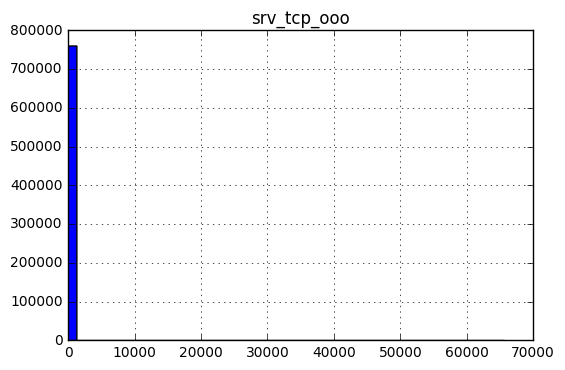

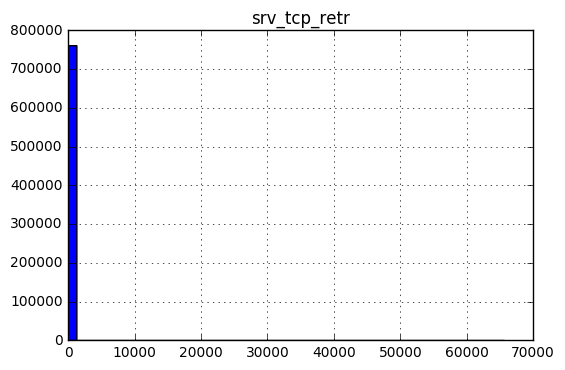

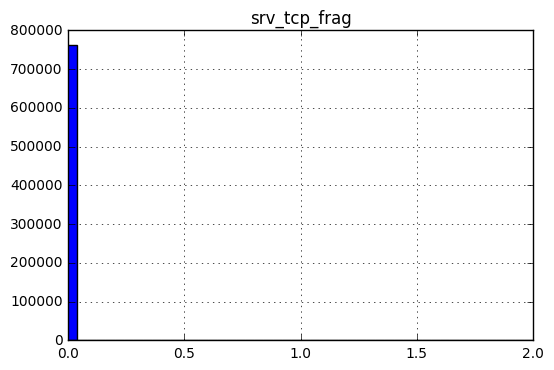

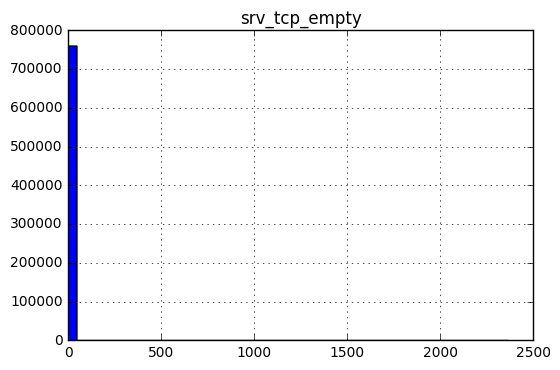

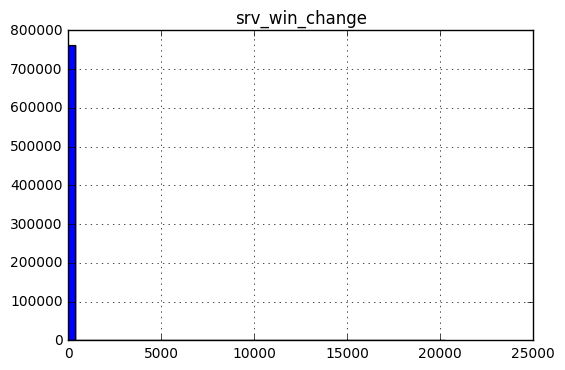

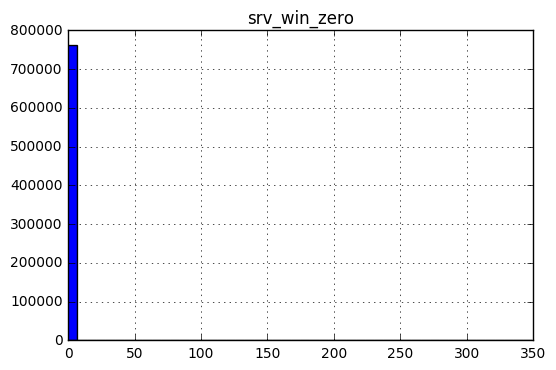

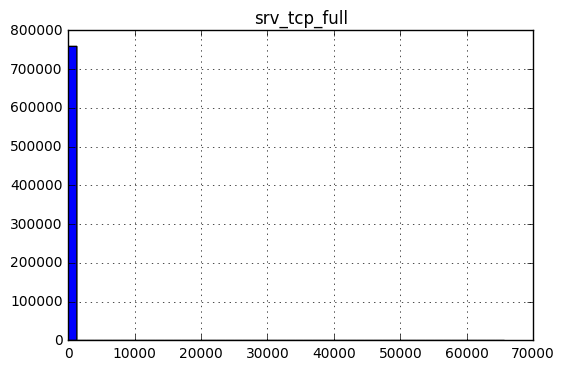

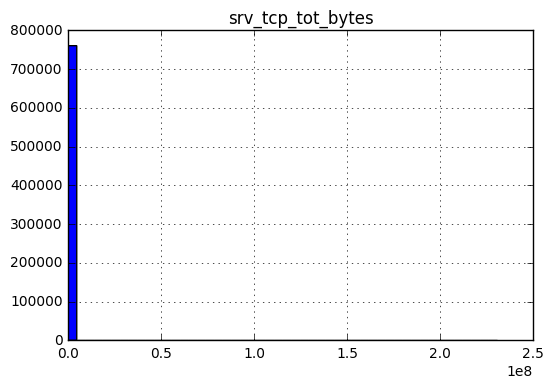

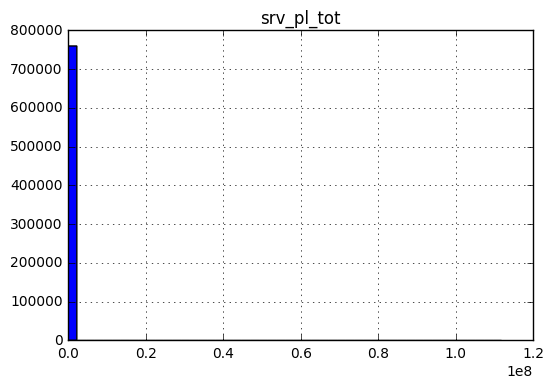

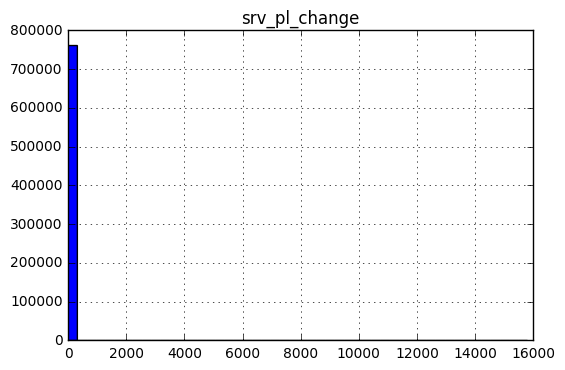

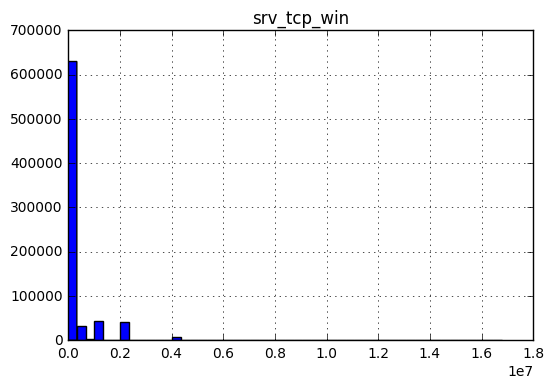

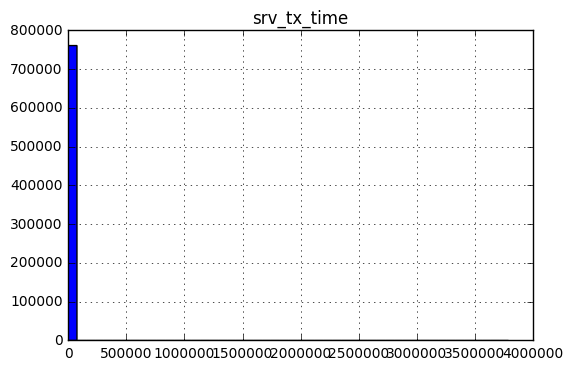

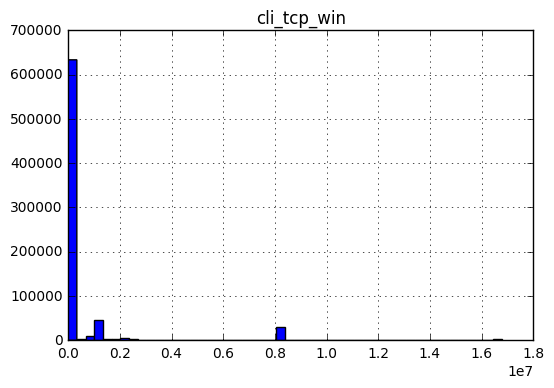

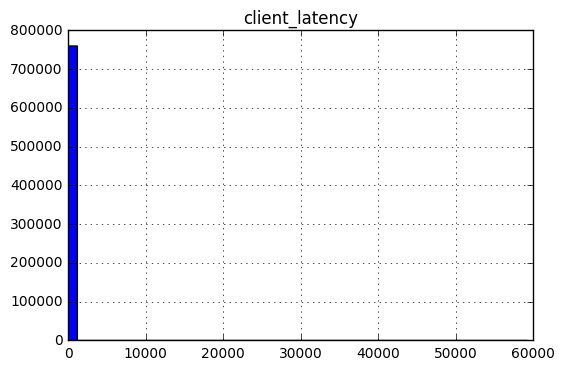

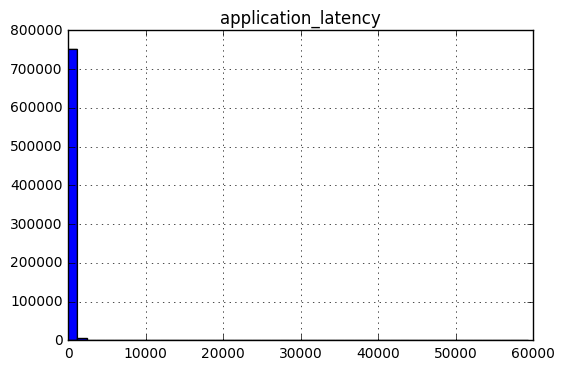

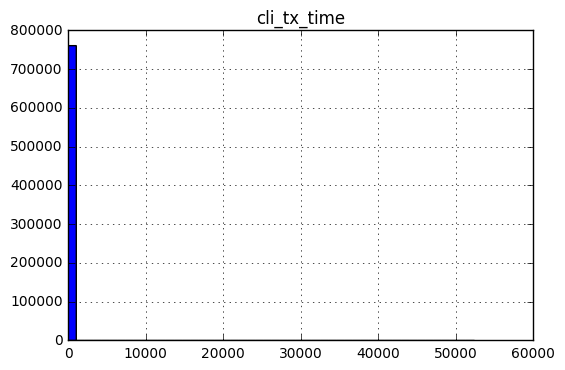

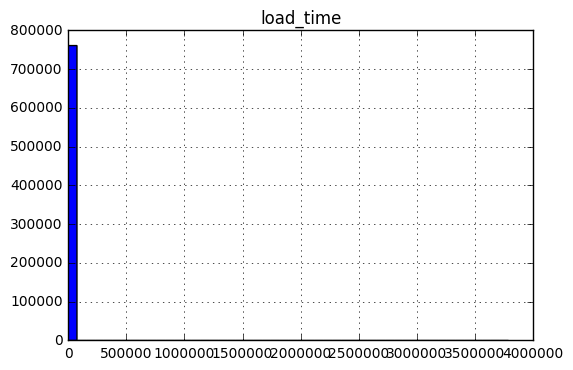

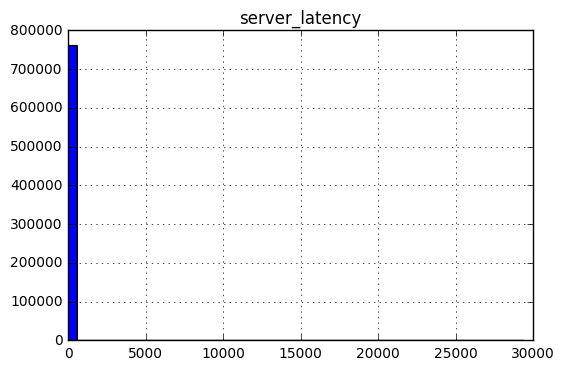

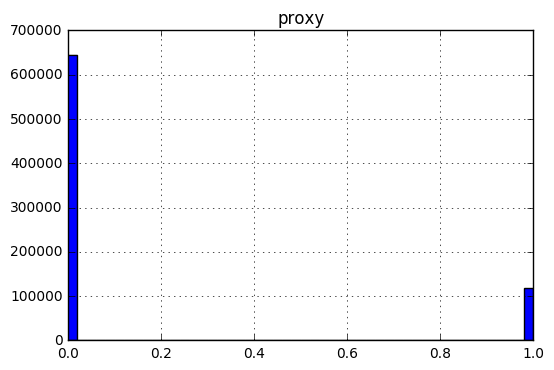

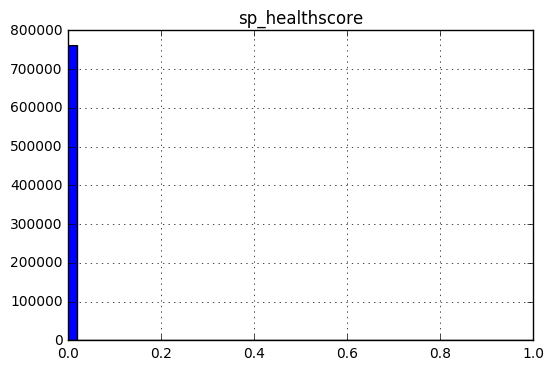

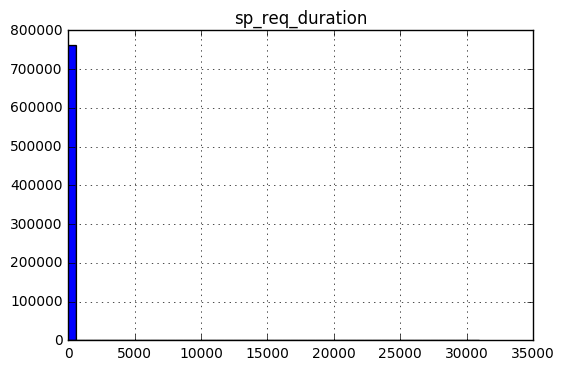

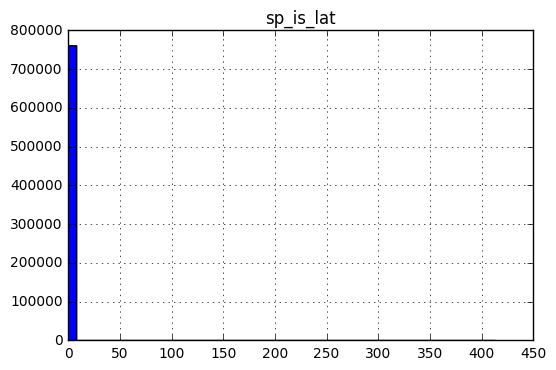

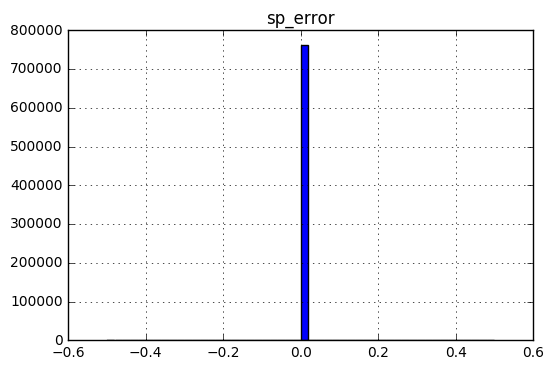

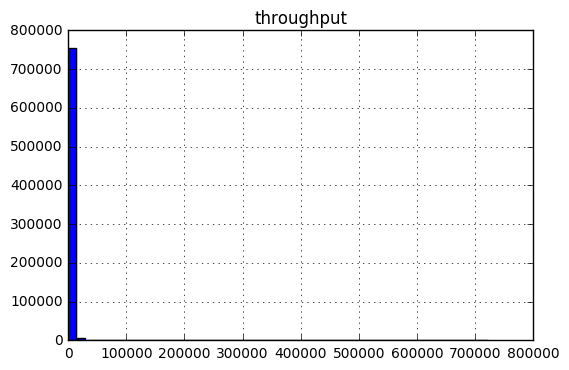

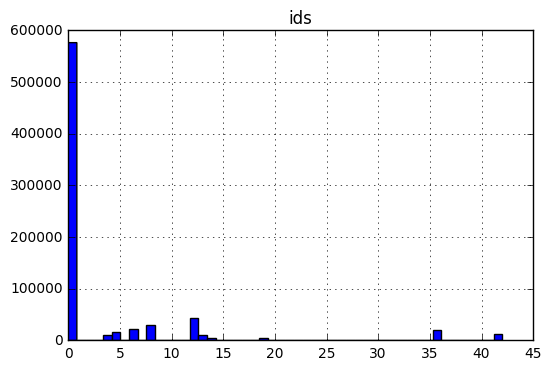

In [6]:
for i in range(0, len(data.columns)):
    data.hist(column = data.columns.values[i], bins = 50)

Vidím, že dáta sú veľmi nerovnomerne rozložené, zväčša sú tak veľmi zaťažené na jednu, že iné hodnoty sa z histogramu ani nedajú odčítať.

## Normalizácia údajov

Z exploratívnej analýzy vyplýva, že dáta sa poriadne nevyvážené a preto ich bude treba znormalizovať. Takisto je väčšina dát zaradená do kategórie 0, preto treba tento obrovský nepomer kompenzovať.

Takisto som z dát vyhodil stĺpce, ktoré mali všetky len jednu hodnotu.

In [7]:
from scipy.stats import boxcox

In [8]:
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


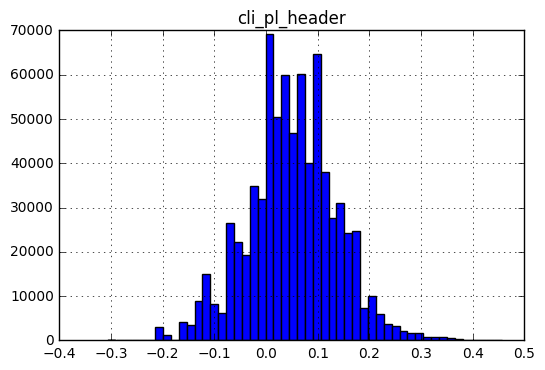

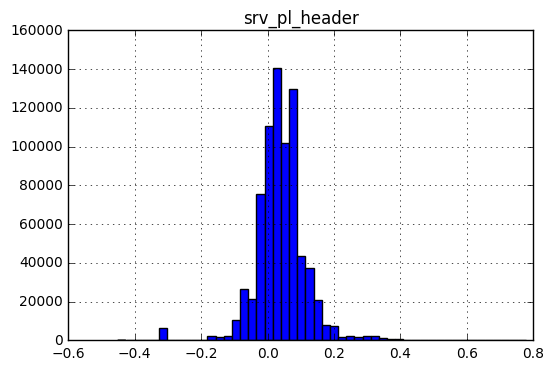

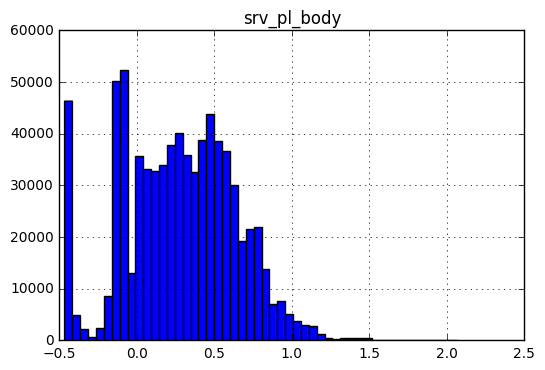

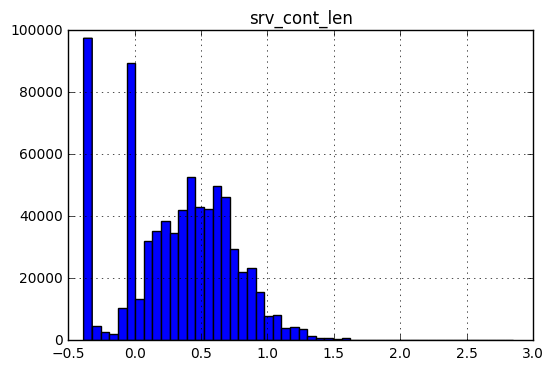

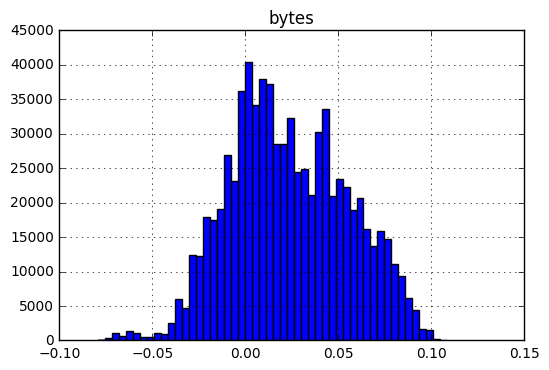

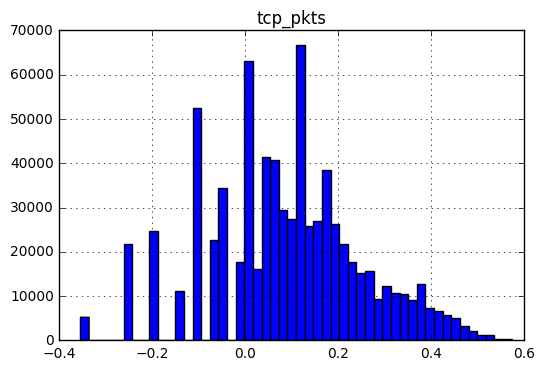

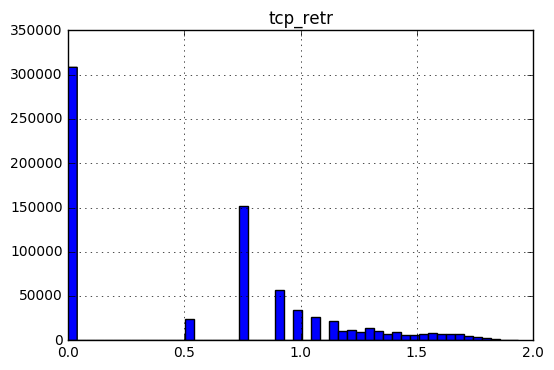

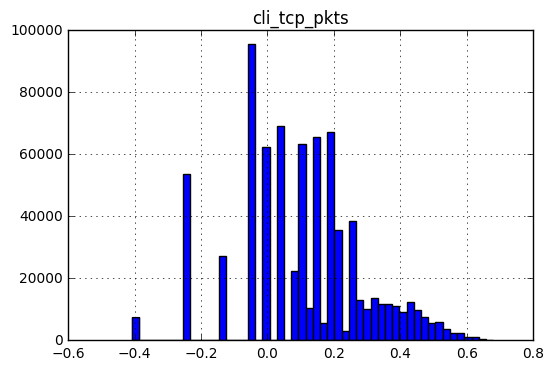

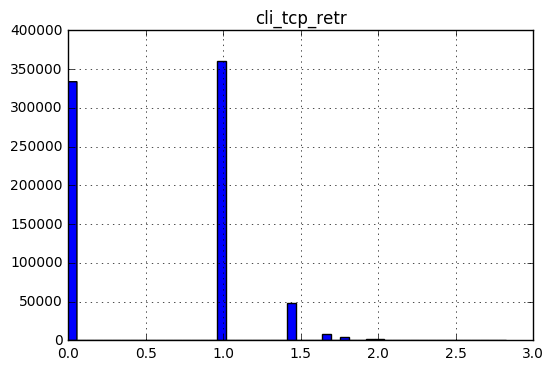

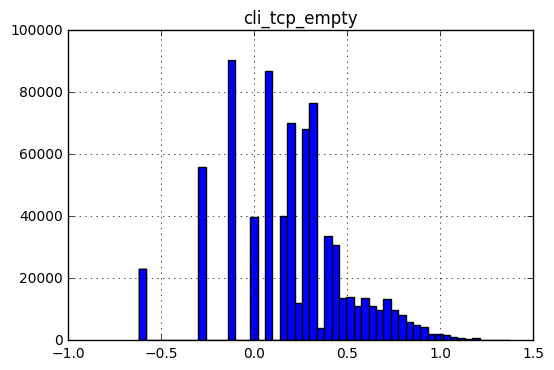

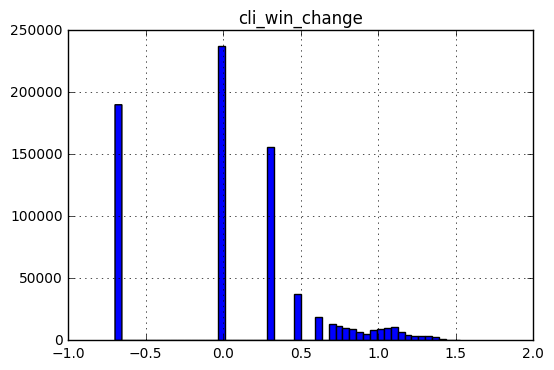

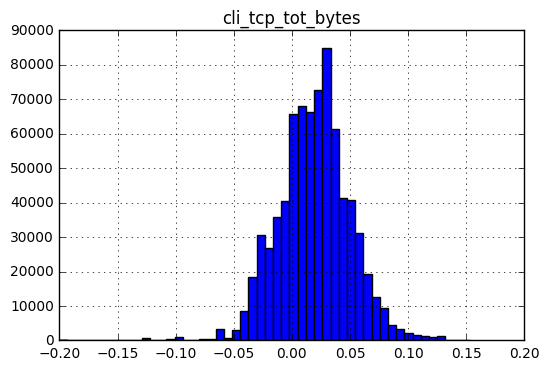

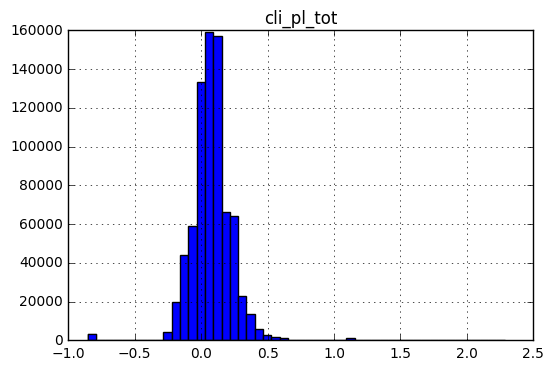

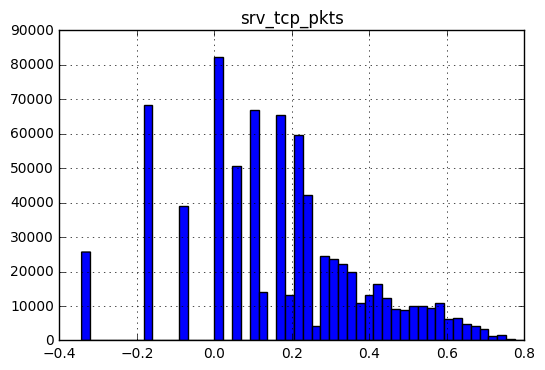

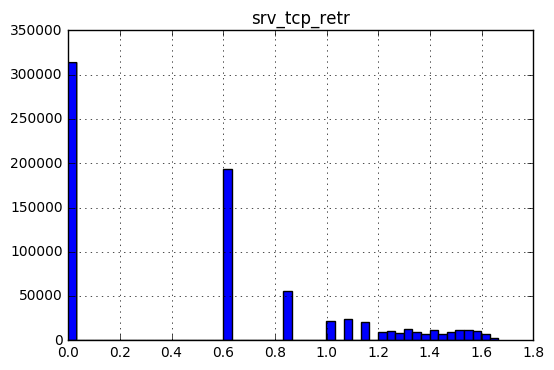

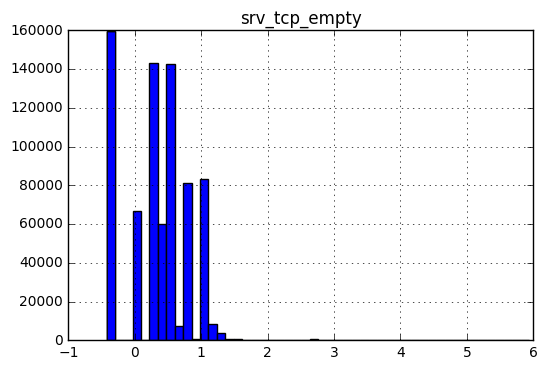

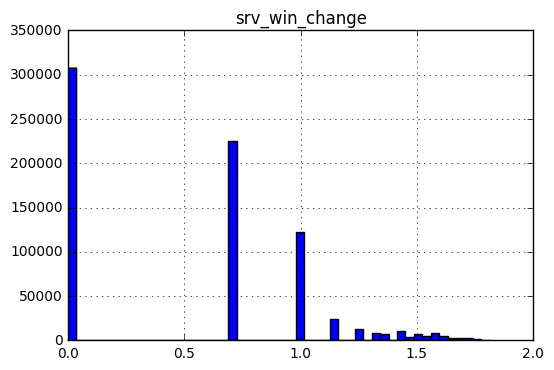

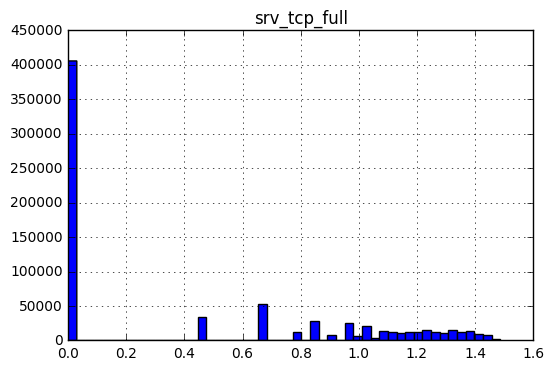

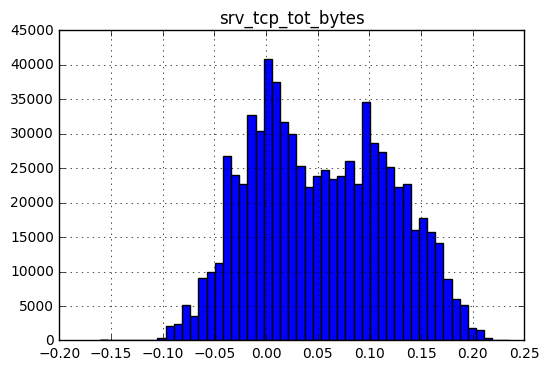

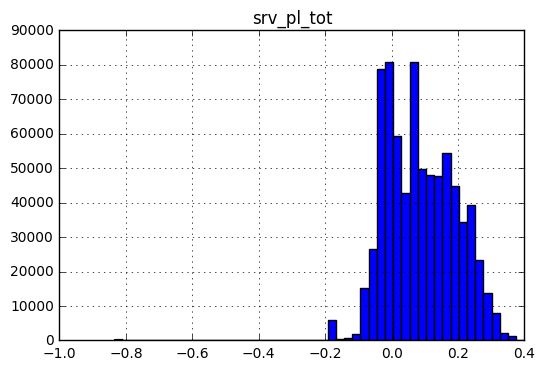

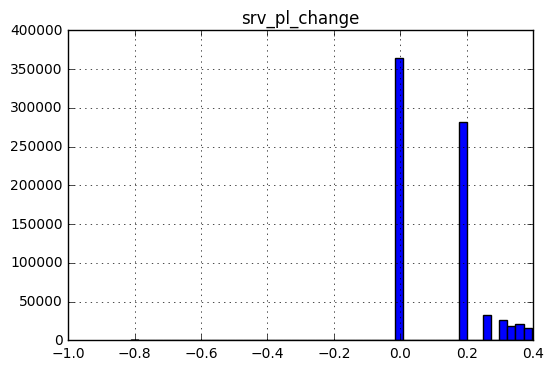

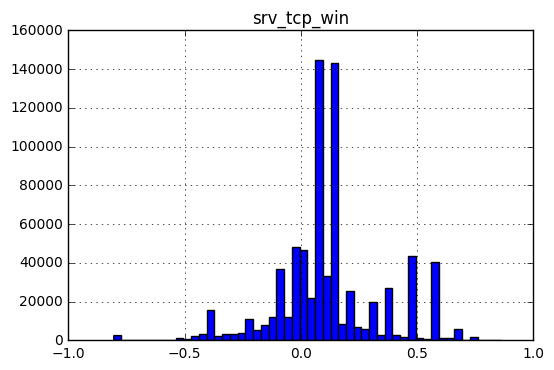

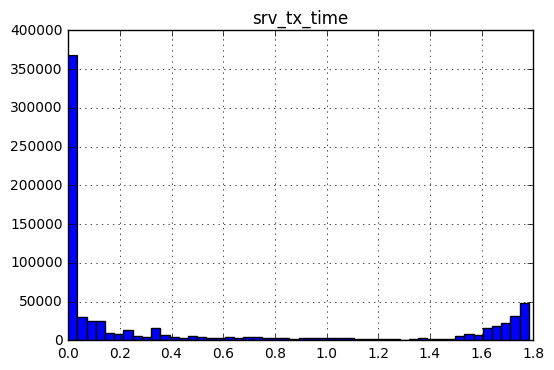

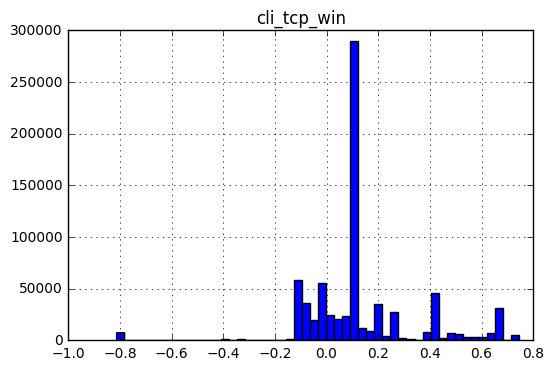

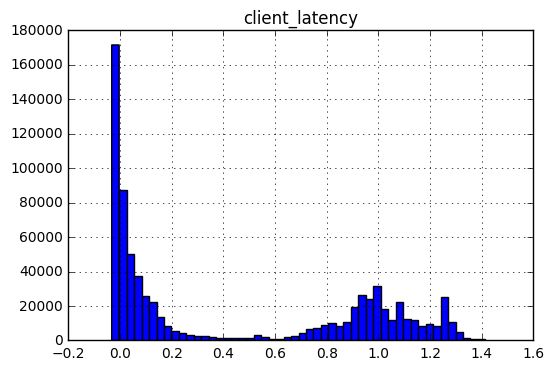

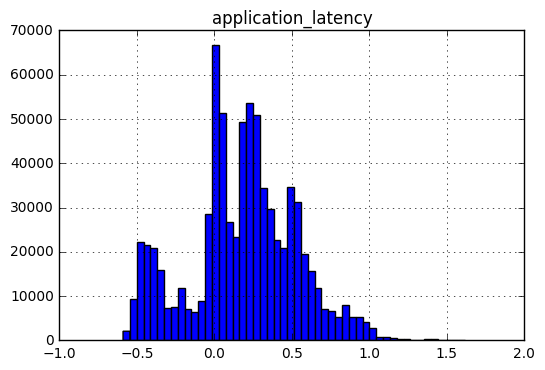

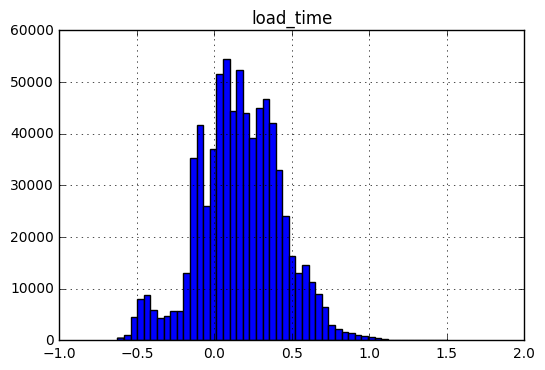

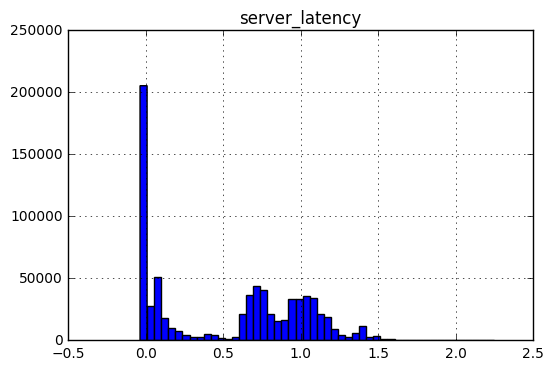

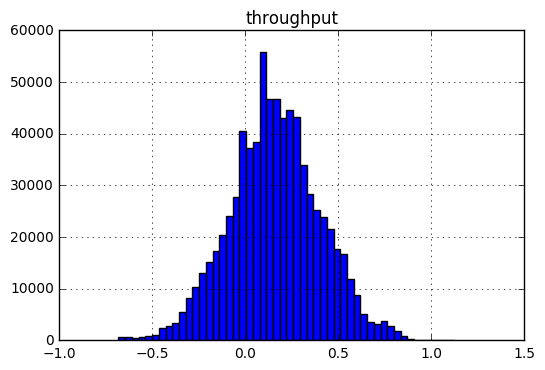

In [9]:
transformed = pd.DataFrame()
transformed['ids'] = data['ids']
lmbda = {}
percentile = pd.DataFrame(data=None, columns=data.columns,index=range(0,2))
name_list = ['cli_pl_body', 'cli_cont_len', 'aggregated_sessions', 'net_samples', 'tcp_frag', 'tcp_ooo', 'cli_tcp_ooo', 'cli_tcp_frag', 'cli_win_zero', 'cli_tcp_full', 'cli_pl_change', 'srv_tcp_ooo', 'srv_tcp_frag', 'srv_win_zero', 'cli_tx_time', 'proxy', 'sp_healthscore', 'sp_req_duration', 'sp_is_lat', 'sp_error', 'ids']
for name in list(data.columns.values):
    if name not in name_list:
        transformed[name], lmbda[name] = boxcox(data[name]+1)# boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
        percentile[name][0] = np.percentile(transformed[name], 25)
        percentile[name][1] = np.percentile(transformed[name], 75)
        transformed[name] = normalization(transformed[name], percentile[name][0], percentile[name][1])
        transformed.hist(column=name, bins=50)

Po transformácií sa už ukazujú aj nejakí outlayeri, ktorích sa môžem zbaviť. Sú to najmä
* cli_tcp_retr pre hodnoty > 1.5
* cli_pl_tot pre hodnoty < -0.5 a > 1
* srv_tcp_empty > 2
* srv_tcp_win < -0.7
* cli_tcp_win < -0.7
* srv_pl_header < -0.3

In [10]:
transformed = transformed[transformed["cli_tcp_retr"] < 1.5]
transformed = transformed[transformed["cli_pl_tot"] > -0.5]
transformed = transformed[transformed["cli_pl_tot"] < 1]
transformed = transformed[transformed["srv_tcp_empty"] < 2]
transformed = transformed[transformed["srv_tcp_win"] > -0.7]
transformed = transformed[transformed["cli_tcp_win"] > -0.7]
transformed = transformed[transformed["srv_pl_header"] > -0.3]

Urobím si teraz histogram pre mnou očistené hodnoty, aby som mohol posúdiť, že či to už teraz vyzerá kúsok lepšie.

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


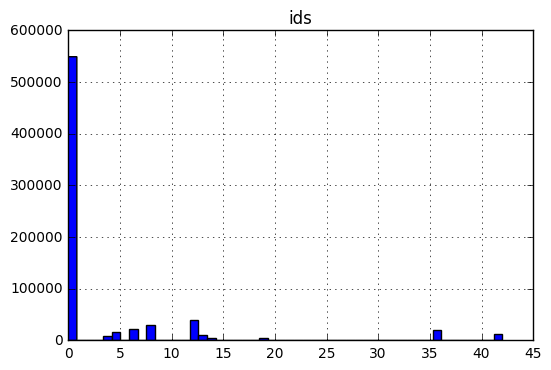

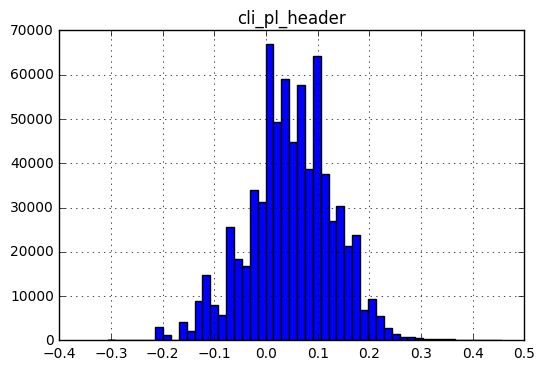

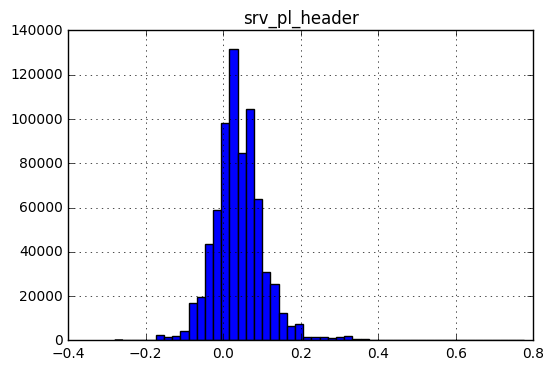

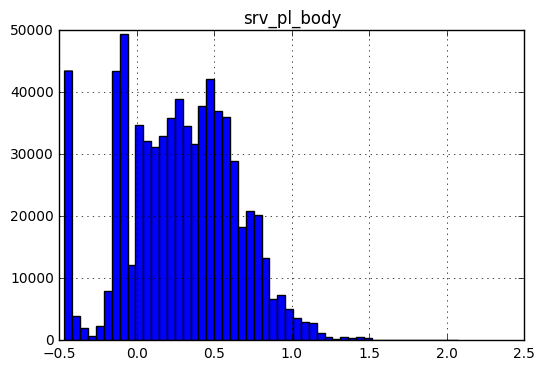

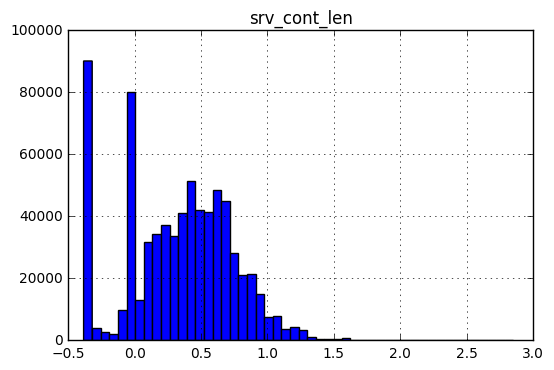

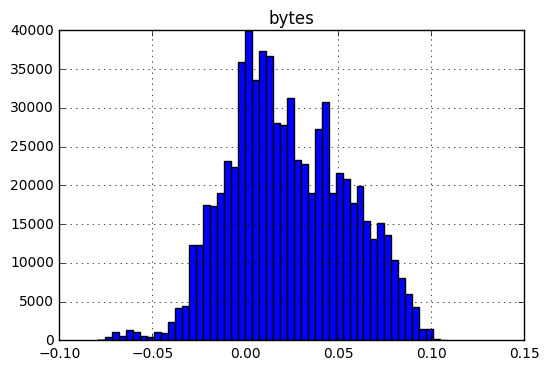

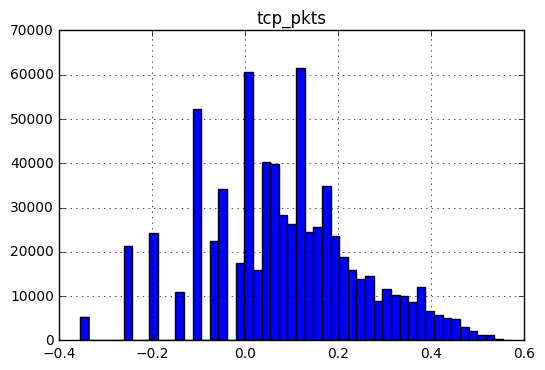

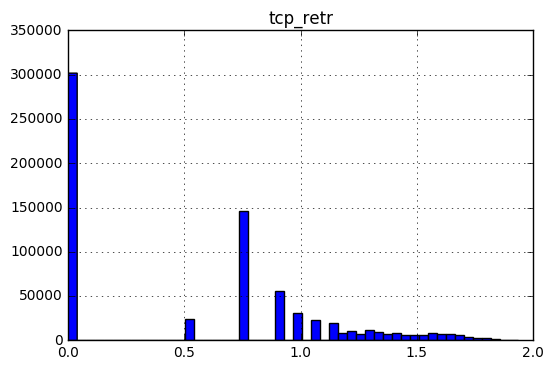

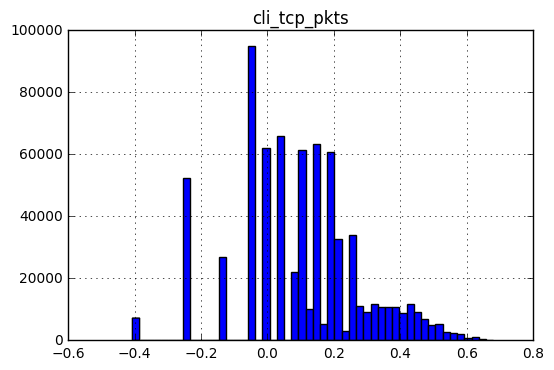

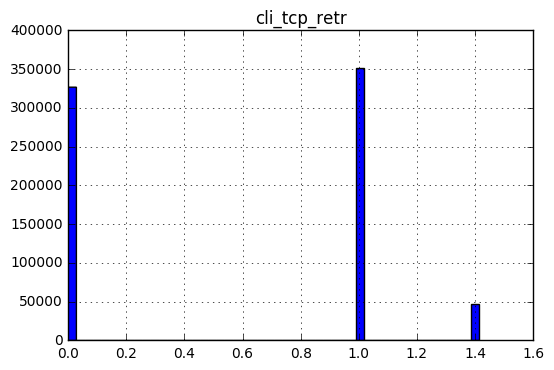

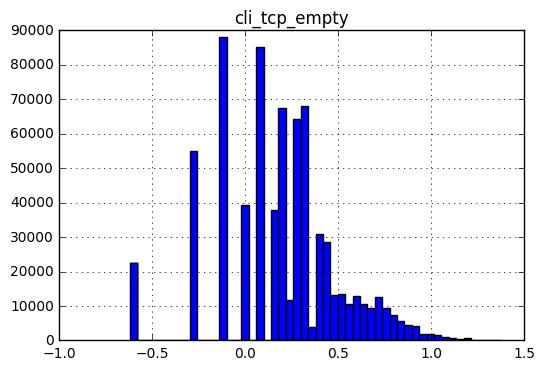

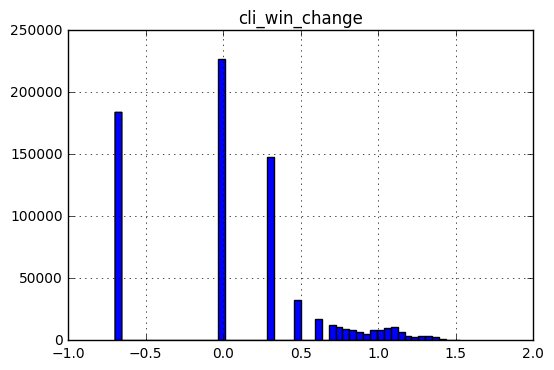

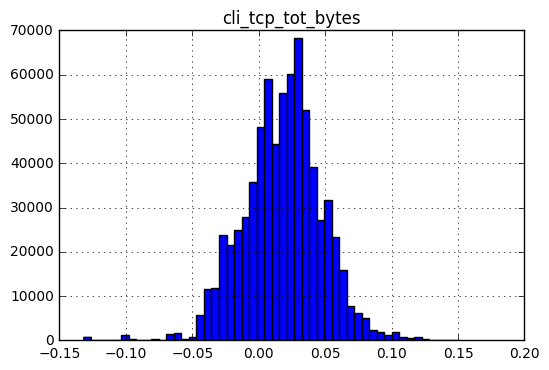

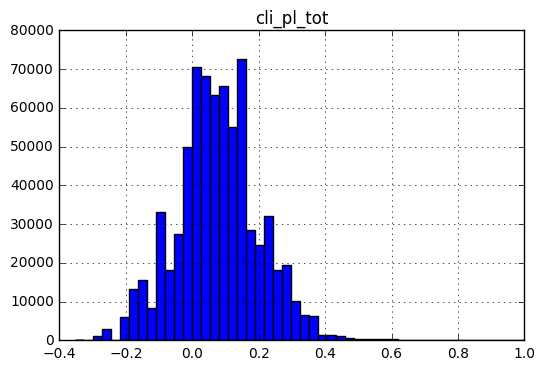

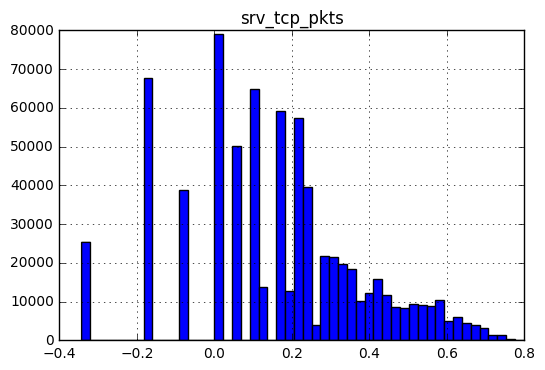

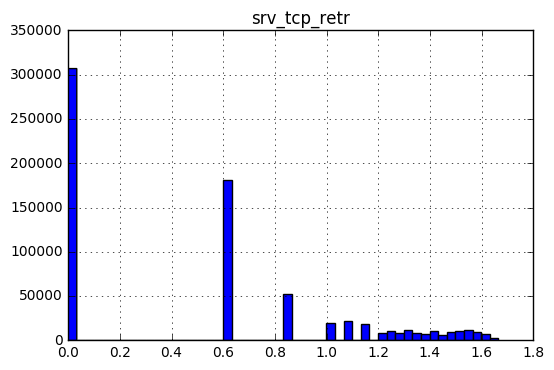

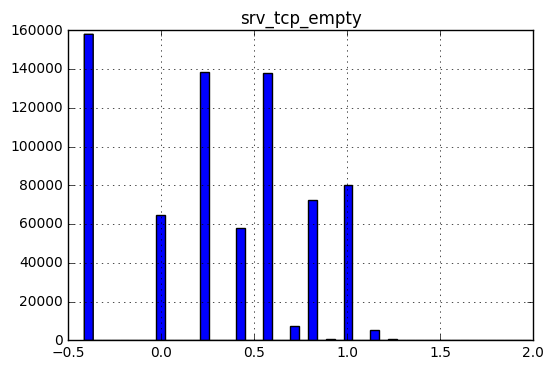

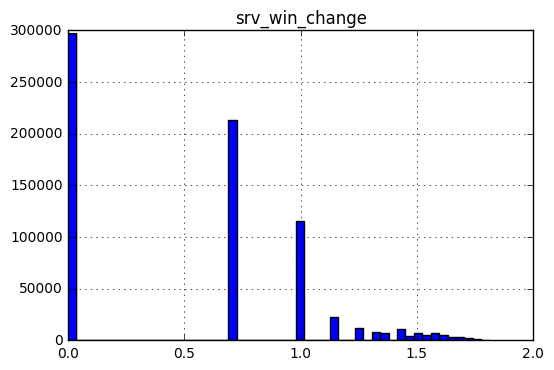

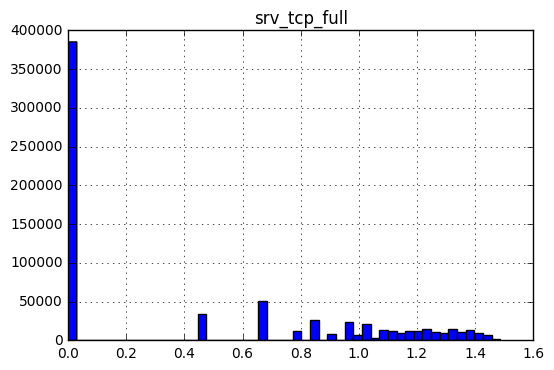

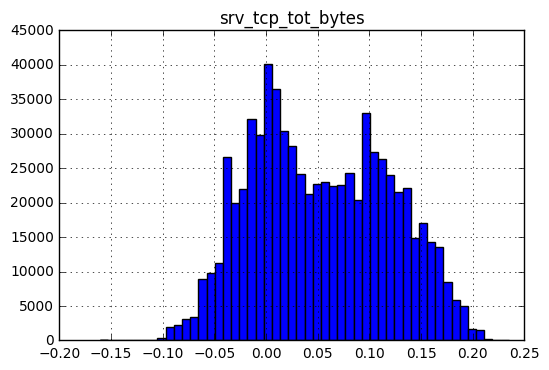

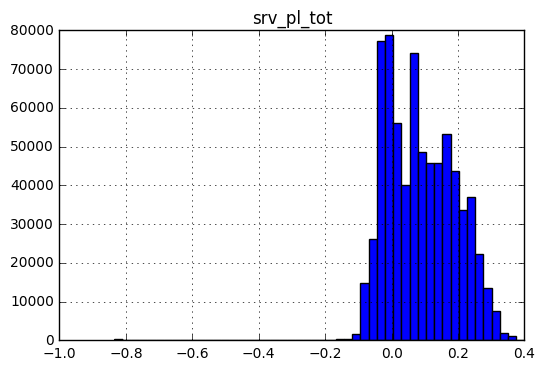

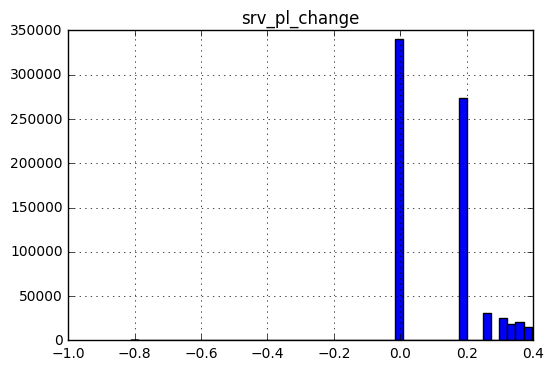

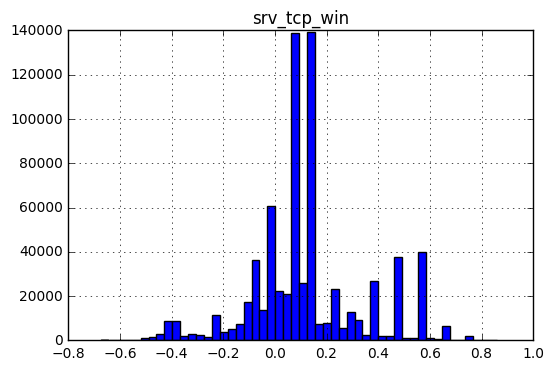

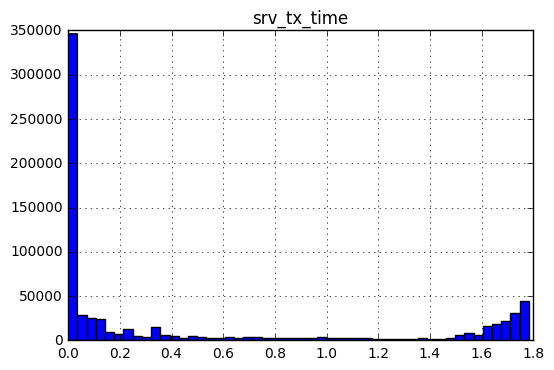

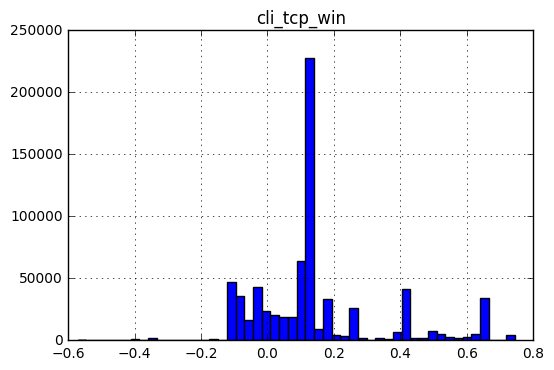

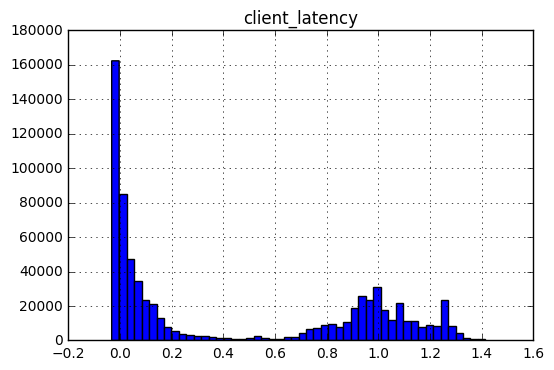

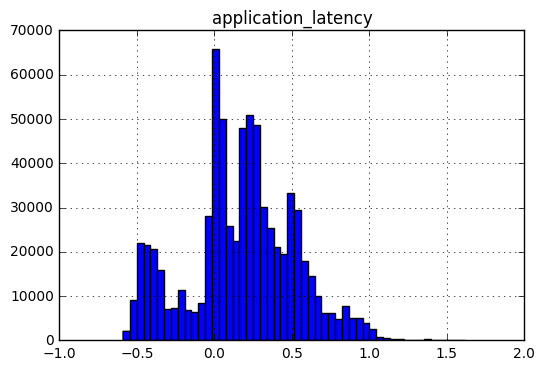

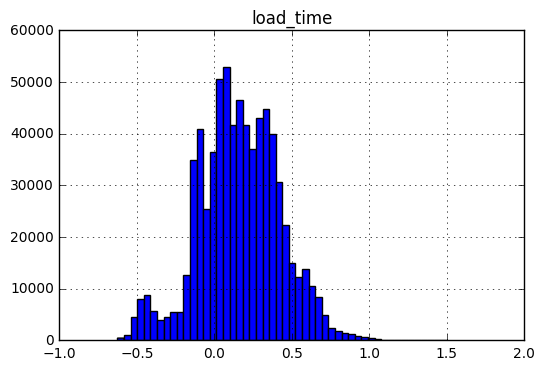

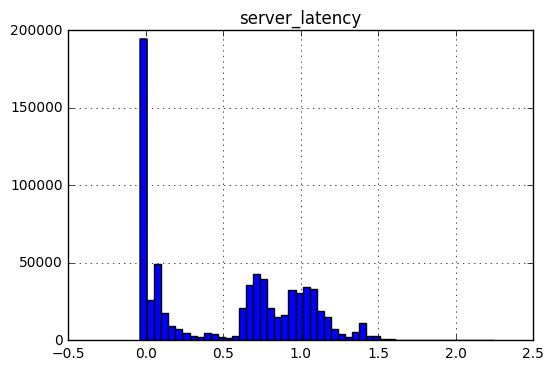

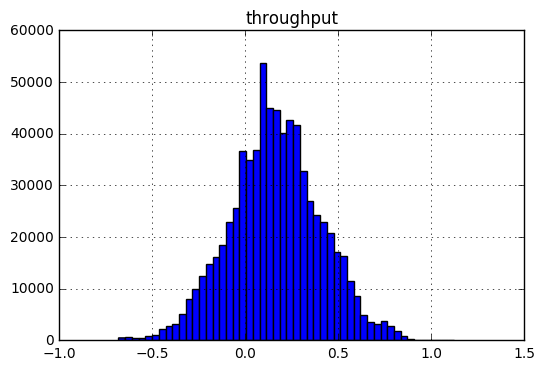

In [11]:
for name in transformed.columns.values:
    transformed.hist(column=name, bins=50)

## Feature engineering

Extrémne veľa hodnôt patrí do skupiny 0, a naopak iné skupiny majú veľmi málo zástupcov, preto je treba početnosť skupín vyvážiť použitím undersamplingu.

In [12]:
arr = []
for i in np.random.rand(len(transformed)):
    arr.append(i>0.9)

undersampled_data = transformed[(transformed['ids'] != 0) | (arr)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9cf77c88>]], dtype=object)

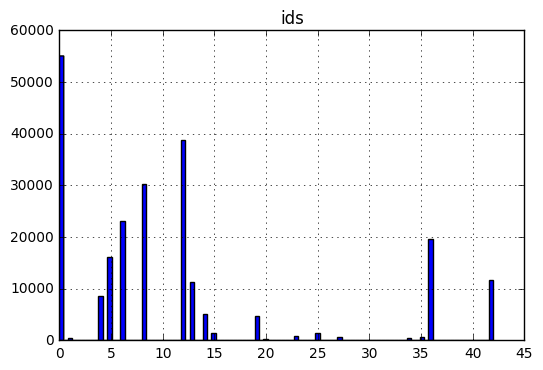

In [13]:
undersampled_data.hist(column="ids", bins=100)

Z histogramu vidno, že teraz je početnosť oveľa vyváženejšia ako bola pôvodne.

## Výber klasifikátorov

Keďže máme obrovský dataset, rozhodol som sa vybrať čo najrýchlejšie a málo náročné klasifikátory, ako je naivný Bayes a random forrest s obmedzenou hĺbkou.

In [14]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators = 20, max_depth = 5)
clf3 = GaussianNB()

X, y = undersampled_data.drop('ids', 1).as_matrix(), undersampled_data.ids

for clf, label in zip([clf1, clf2, clf3], ['Logistic Regression', 'Random Forest', 'naive Bayes']):

    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.03) [Logistic Regression]
Accuracy: 0.80 (+/- 0.03) [Random Forest]
Accuracy: 0.69 (+/- 0.03) [naive Bayes]


Naivný Bayes má desnú úspešnosť aj na trénovacej sade, logistická regresia a náhodný les vychádzajú približne narovnako. Skúsim ich teraz hodiť do Ensamblu a uvidíme ako sa to zlepší.

In [15]:
eclf = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('NB', clf3)], voting='hard')
scores = cross_validation.cross_val_score(eclf, X, y, cv=5, scoring='accuracy')
scores.mean()

0.81709404922682771

Vidíme, že ensamble je o niečo málo lepší, ale nie je to stále žiadna sláva. Skúsme to teraz na validačnom datasete.

In [16]:
valid_data = pd.read_csv("data/valid.csv", sep='\t')
trans_valid = pd.DataFrame()
for word in list(valid_data.columns.values):
    if word not in name_list:
        trans_valid[word] = boxcox(valid_data[word] + 1, lmbda=lmbda[word])
del valid_data


In [17]:
for word in list(trans_valid.columns.values):
    if word not in name_list:
        trans_valid[word] = normalization(trans_valid[word], percentile[word][0], percentile[word][1])

tmp = eclf.fit(X,y)

In [18]:
out_valid = tmp.predict(trans_valid)
valid_test = pd.read_csv("data/valid_target.csv", sep='\t', names=["ids"])

j = 0
for i in range(0, len(valid_test)):
    if out_valid[i] == valid_test['ids'][i]:
        j += 1

print(j / len(out_valid))

0.8172138222415489


In [19]:
out_valid.tofile("output.csv", sep='\n', format="%d")

In [20]:
print(np.count_nonzero(out_valid))

219565
